In [51]:
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.neighbors
import sklearn.ensemble
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

# Бронирование отелей. Анализ данных.

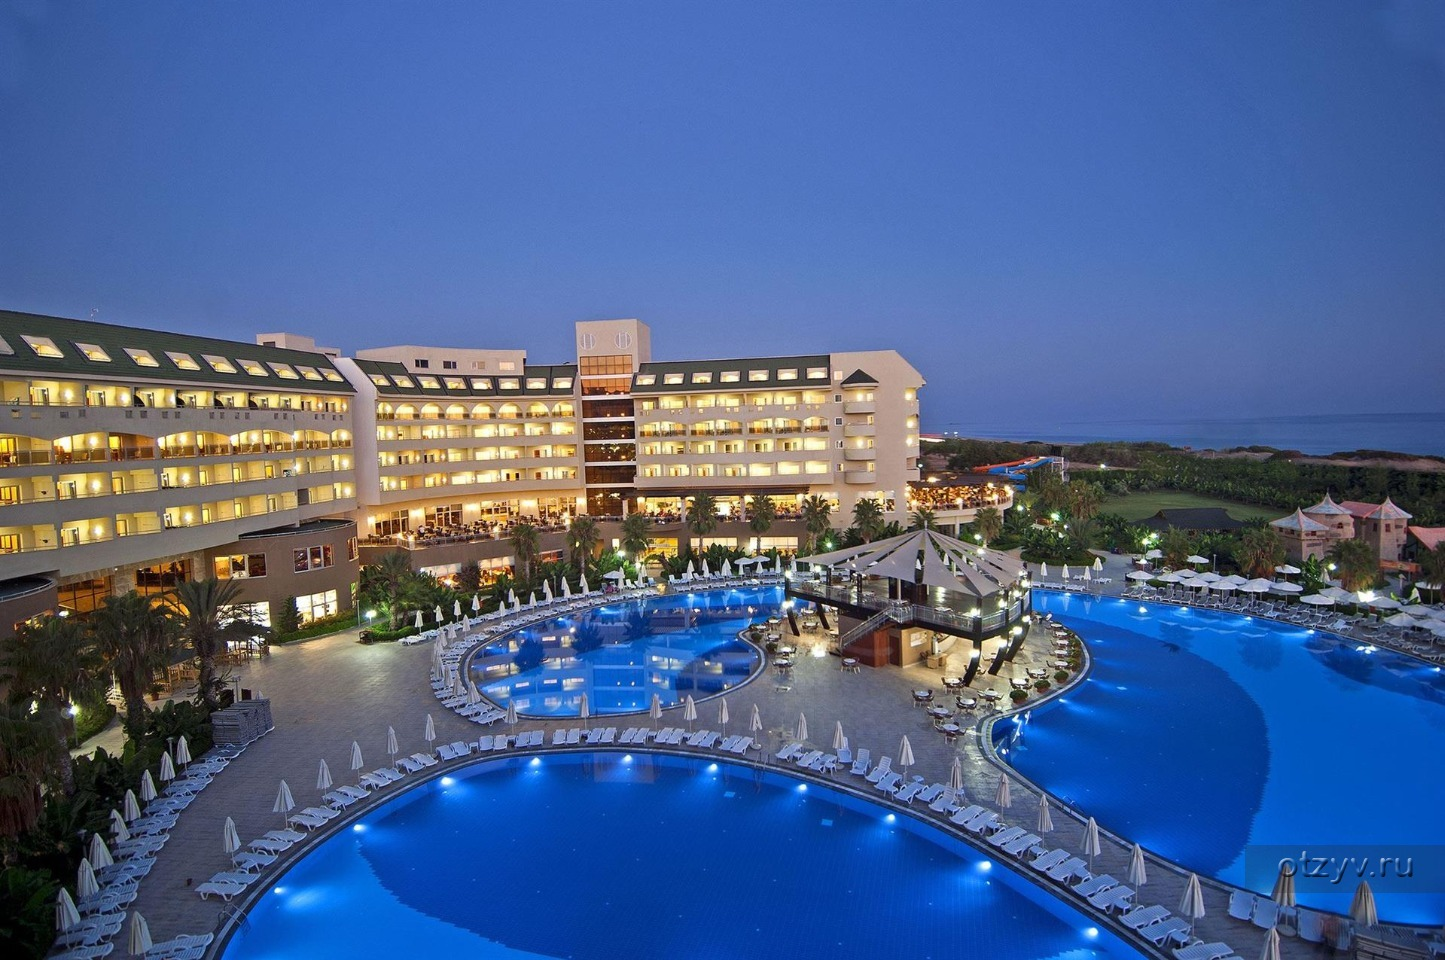

## Описание задачи.

Этот набор данных содержит 119390 наблюдений для City Hotel и Resort Hotel. Каждое наблюдение представляет собой бронирование отеля в период с 1 июля 2015 года по 31 августа 2017 года. Здесь содержится вся информация о бронировании: сколько бронирований было отменено, сколько взрослых прибудет в отель, сколько детей, время пребывания, продолжительность проживания и другие признаки. Благодаря этим данным мы сможем проанализировать, найти недостатки, улучшить работу данных отелей, предсказывать отмену брониования и пытаться исправить это.

## Чтение данных.

Загрузим датасет, с которым будем работать.

In [7]:
url = "https://raw.githubusercontent.com/KorobkovaKV/Machine_Learning/main/hotel_booking.csv"
data = pd.read_csv(url)

In [4]:
data

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  customer_type     adr  \
0                          0       2  ...      Transient    0.00   
1                          0       2  ...      Transient    0.00   
2                          1       1  ...      Transient   75.00   
3                          1       1  ...      Transient   75.00   
4                          2       2  ...      Transient   98.00   
...                      ...     ...  ...            ...     ...   
119385                     5       2  ...      Transient   96.14   
119386                     5       3  ...      Transient  225.43   
119387                     5       2  ...      Transient  157.71   
119388                     5       2  ...      Transient  104.40   
119389                     7       2  ...      Transient  151.20   

       required_car_parking_spaces total_of_special_requests  \
0                                0                         0   
1                                0                         0   
2                                0                         0   
3                                0                         0   
4                                0                         1   
...                            ...                       ...   
119385                           0                         0   
119386                           0                         2   
119387                           0                         4   
119388                           0                         0   
119389                           0                         2   

       reservation_status reservation_status_date                name  \
0               Check-Out              2015-07-01       Ernest Barnes   
1               Check-Out              2015-07-01        Andrea Baker   

In [9]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

**Признаки:**
hotel - отель(Resort Hotel или City Hotel); 
is_canceled - отмена бронирования; 
lead_time - время, прошедшее с момента бронирования до прибытия в отель; 
arrival_date_year - год прибытия; 
arrival_date_month - месяц прибытия; 
arrival_date_week_number - номер недели прибытия; 
arrival_date_day_of_month - день прибытия; 
stays_in_weekend_nights - число ночей, проведенных в выходные в отеле; 
stays_in_week_nights - число ночей, проведенных в будни в отеле; 
adults - число взрослых; 
children - число детей; 
babies - число младенцев; 
meal - вид питания (SC - без питания; BB - завтрак; HB - завтрак, ужин; FB - завтрак, обед, ужин); 
country - страна; 
market_segment - сегмент рынка (ТА - куплена через туристическое агенство; ТО - через туроператора); 
distribution_channel - канал распространения бронирования; 
is_repeated_guest - повторно ли прибывает гость (1) или нет (0); 
previous_cancellations - число предыдущих отмен бронирования; 
previous_bookings_not_canceled - число предыдущих не отмененных бронирований; 
reserved_room_type - тип забронированного номера; 
assigned_room_type - тип назначенного номера (иногда тип забранированного номера может отличаться от назначенного); 
booking_changes - число изменений или дополнений, внесенных в бронирование с момента первого броирования;
deposit_type - тип депозита (No Deposit -  без депозита, Non Refund - внесена полная стоимость проживания, Refundable - внесено меньше стоимости проживания); 
agent - ID туристического агентства, сделавшего бронирование; 
company - ID компании или юридического лица, совершившего бронирование или ответственного за его оплату; 
days_in_waiting_list - число дней, в течение которых бронирование находилось в листе ожидания, прежде чем оно было подтверждено клиенту; 
customer_type - тип клиента (группа - когда бронирование связано с группой; временный - когда бронирование не является частью группы или контракта); 
adr - средняя дневная ставка (рассчитывается путем деления суммы всех транзакций по размещению на общее количество ночей проживания); 
required_car_parking_spaces - число требуемых мест парковки; 
total_of_special_requests - число особых запросов, сделанных клиентом; 
reservation_status - статус последнего бронирования (Canceled - бронирование было отменено клиентом, Check-Out - зарегистрировался, но уже уехал; No-Show - не заселился и не проинформировал отель о причине); 
reservation_status_date - дата установления последнего статуса; 
name - имя; 
email - электронная почта; 
phone-number - номер телефона; 
credit_card - номер кредитной карты; 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [17]:
data['hotel'] = data['hotel'].astype('category');
data['arrival_date_month'] = data['arrival_date_month'].astype('category');
data['meal'] = data['meal'].astype('category');
data['country'] = data['country'].astype('category');
data['market_segment'] = data['market_segment'].astype('category');
data['distribution_channel'] = data['distribution_channel'].astype('category');
data['reserved_room_type'] = data['reserved_room_type'].astype('category');
data['assigned_room_type'] = data['assigned_room_type'].astype('category');
data['deposit_type'] = data['deposit_type'].astype('category');
data['customer_type'] = data['customer_type'].astype('category');
data['reservation_status'] = data['reservation_status'].astype('category');
data['reservation_status_date'] = data['reservation_status_date'].astype('category');
data['name'] = data['name'].astype('category');
data['email'] = data['email'].astype('category');
data['phone-number'] = data['phone-number'].astype('category');
data['credit_card'] = data['credit_card'].astype('category');
data.dtypes

hotel                             category
is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
adults                               int64
children                           float64
babies                               int64
meal                              category
country                           category
market_segment                    category
distribution_channel              category
is_repeated_guest                    int64
previous_cancellations               int64
previous_bookings_not_canceled       int64
reserved_room_type                category
assigned_room_type                category
booking_changes                      int64
deposit_type                      category
agent      

Привели к типу, который хранит категориальные значения.

## Визуализация данных и вычисление основных характеристик.

In [12]:
data.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [13]:
data.describe(include=['category'])

hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  \
count        119390        119390             119390                  119390   
unique            3             4                  3                     926   
top      No Deposit     Transient          Check-Out              2015-10-21   
freq         104641         89613              75166                    1461   

                name                email  phone-number       credit_card  
count         119390               119390        119390            119390  
unique         81503               115889        119390              9000  
top     Robert Smith  Michael.C@gmail.com  999-999-0072  ************4923  
freq              48                    6             1                28

Получили информацию о количественных и категоральных значениях.

In [14]:
cor_matrix = data.corr()
cor_matrix

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.005048  -0.037622           0.054624   
babies                            -0.032491  -0.020915          -0.013192   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations             0.110133   0.086042          -0.119822   
previous_bookings_not_canceled    -0.057358  -0.073548           0.029218   
booking_changes                   -0.144381   0.000149           0.030872   
agent                             -0.083114  -0.069741           0.063457   
company                           -0.020642   0.151464           0.259095   
days_in_waiting_list               0.054186   0.170084          -0.056497   
adr                                0.047557  -0.063077           0.197580   
required_car_parking_spaces       -0.195498  -0.116451          -0.013684   
total_of_special_requests         -0.234658  -0.095712           0.108531   

                                arrival_date_week_number  \
is_canceled                                     0.008148   
lead_time                                       0.126871   
arrival_date_year                              -0.540561   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.066809   
stays_in_weekend_nights                         0.018208   
stays_in_week_nights                            0.015558   
adults                                          0.025909   
children                                        0.005518   
babies                                          0.010395   
is_repeated_guest                              -0.030131   
previous_cancellations                          0.035501   
previous_bookings_not_canceled                 -0.020904   
booking_changes                                 0.005508   
agent                                          -0.031201   
company                                        -0.076760   
days_in_waiting_list                            0.022933   
adr                                             0.075791   
required_car_parking_spaces                     0.001920   
total_of_special_requests                       0.026149   

                                arrival_date_day_of_month  \
is_canceled                                     -0.006130   
lead_time                                        0.002268   
arrival_date_year                               -0.000221   
arrival_date_week_number                         0.066809   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.016354   
stays_in_week_nights                            -0.028174   
adults                                          -0.001566   
children                                         0.014544   
babies                                          -0.000230   
is_repeated_guest                               -0.006145   
previous_cancellations                          -0.027011   
previous_bookings_not_canceled                  -0.000300   
booking_changes                                  0.010613   
agent                                            0.001487   
company                                          0.044858   
days_in_waiting_list                             0.022728   
adr                                              0.0302

Построили матрицу кореляции для количественных значений.

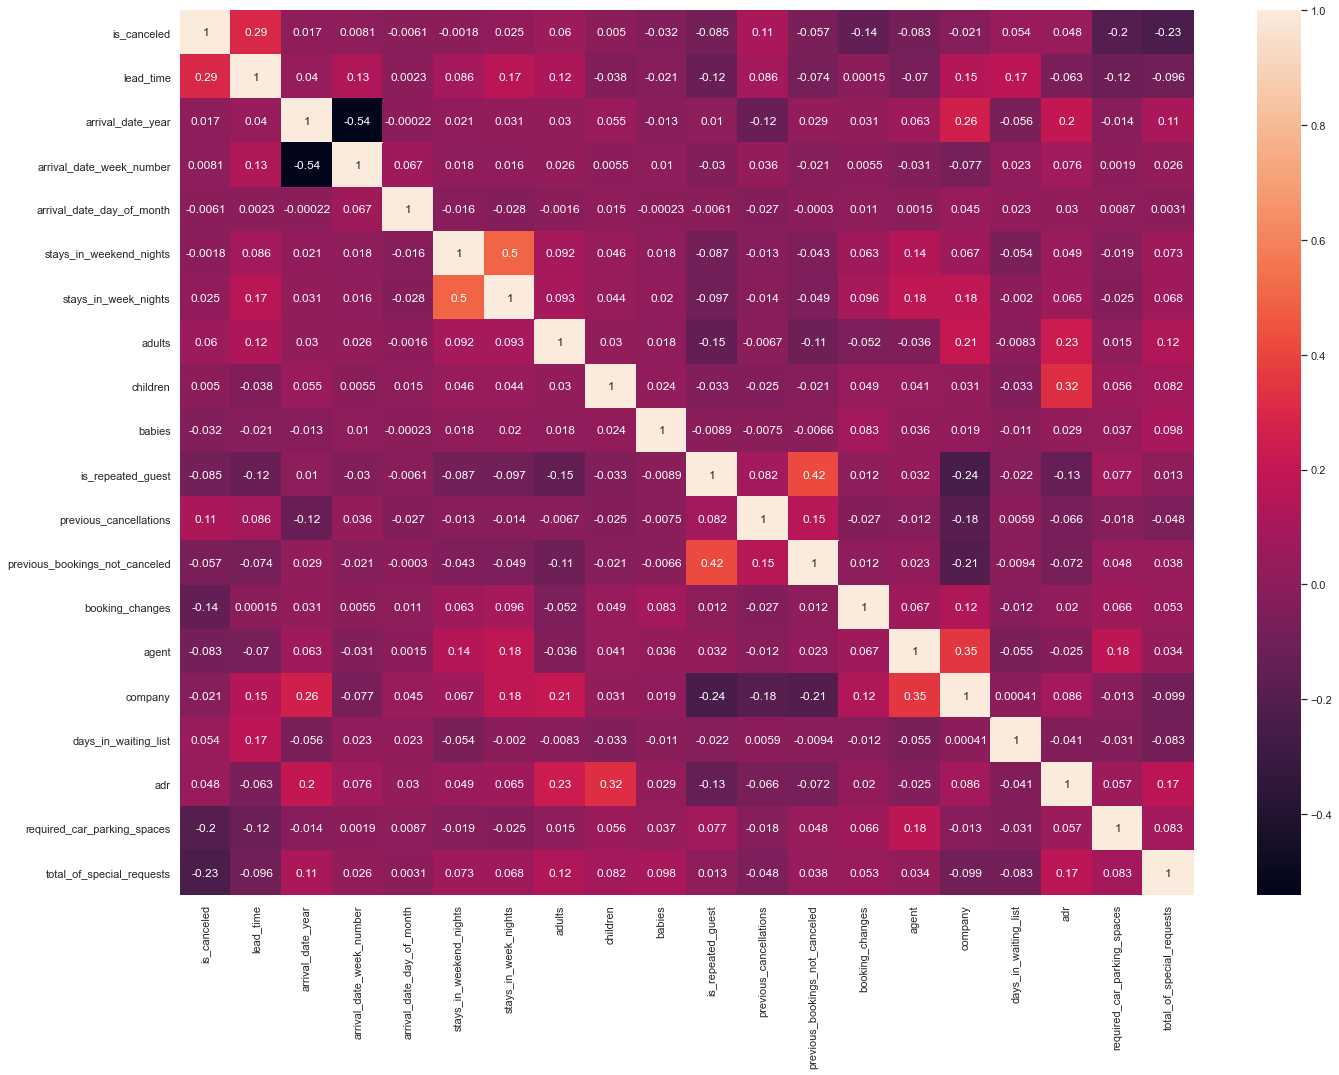

In [15]:
sns.set(rc={'figure.figsize':(22.7,16.27)})
ax = sns.heatmap(cor_matrix, annot=True)

In [16]:
cor_matrix > 0.5

is_canceled  lead_time  arrival_date_year  \
is_canceled                            True      False              False   
lead_time                             False       True              False   
arrival_date_year                     False      False               True   
arrival_date_week_number              False      False              False   
arrival_date_day_of_month             False      False              False   
stays_in_weekend_nights               False      False              False   
stays_in_week_nights                  False      False              False   
adults                                False      False              False   
children                              False      False              False   
babies                                False      False              False   
is_repeated_guest                     False      False              False   
previous_cancellations                False      False              False   
previous_bookings_not_canceled        False      False              False   
booking_changes                       False      False              False   
agent                                 False      False              False   
company                               False      False              False   
days_in_waiting_list                  False      False              False   
adr                                   False      False              False   
required_car_parking_spaces           False      False              False   
total_of_special_requests             False      False              False   

                                arrival_date_week_number  \
is_canceled                                        False   
lead_time                                          False   
arrival_date_year                                  False   
arrival_date_week_number                            True   
arrival_date_day_of_month                          False   
stays_in_weekend_nights                            False   
stays_in_week_nights                               False   
adults                                             False   
children                                           False   
babies                                             False   
is_repeated_guest                                  False   
previous_cancellations                             False   
previous_bookings_not_canceled                     False   
booking_changes                                    False   
agent                                              False   
company                                            False   
days_in_waiting_list                               False   
adr                                                False   
required_car_parking_spaces                        False   
total_of_special_requests                          False   

                                arrival_date_day_of_month  \
is_canceled                                         False   
lead_time                                           False   
arrival_date_year                                   False   
arrival_date_week_number                            False   
arrival_date_day_of_month                            True   
stays_in_weekend_nights                             False   
stays_in_week_nights                                False   
adults                                              False   
children                                            False   
babies                                              False   
is_repeated_guest                                   False   
previous_cancellations                              False   
previous_bookings_not_canceled                      False   
booking_changes                                     False   
agent                                               False   
company                                             False   
days_in_waiting_list                                False   
adr                                                 Fal

Признаки сильно не коррелируют друг с другом.

In [18]:
data['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

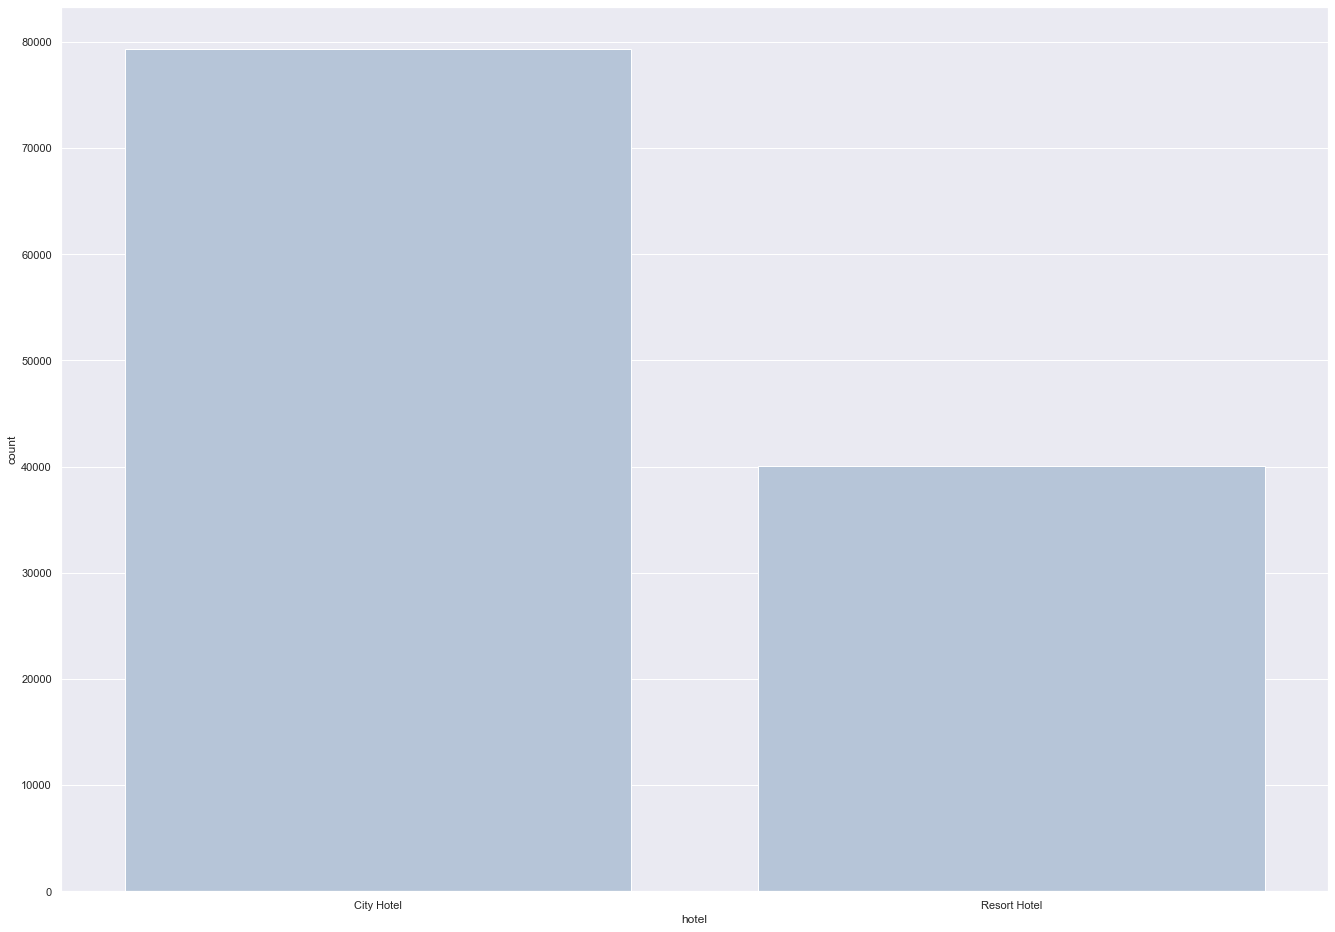

In [37]:
sns.countplot(x = 'hotel', data = data, color = ("#B0C4DE"))
pass

Спрос на City Hotel больше, чем на Resort Hotel.

In [38]:
data['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

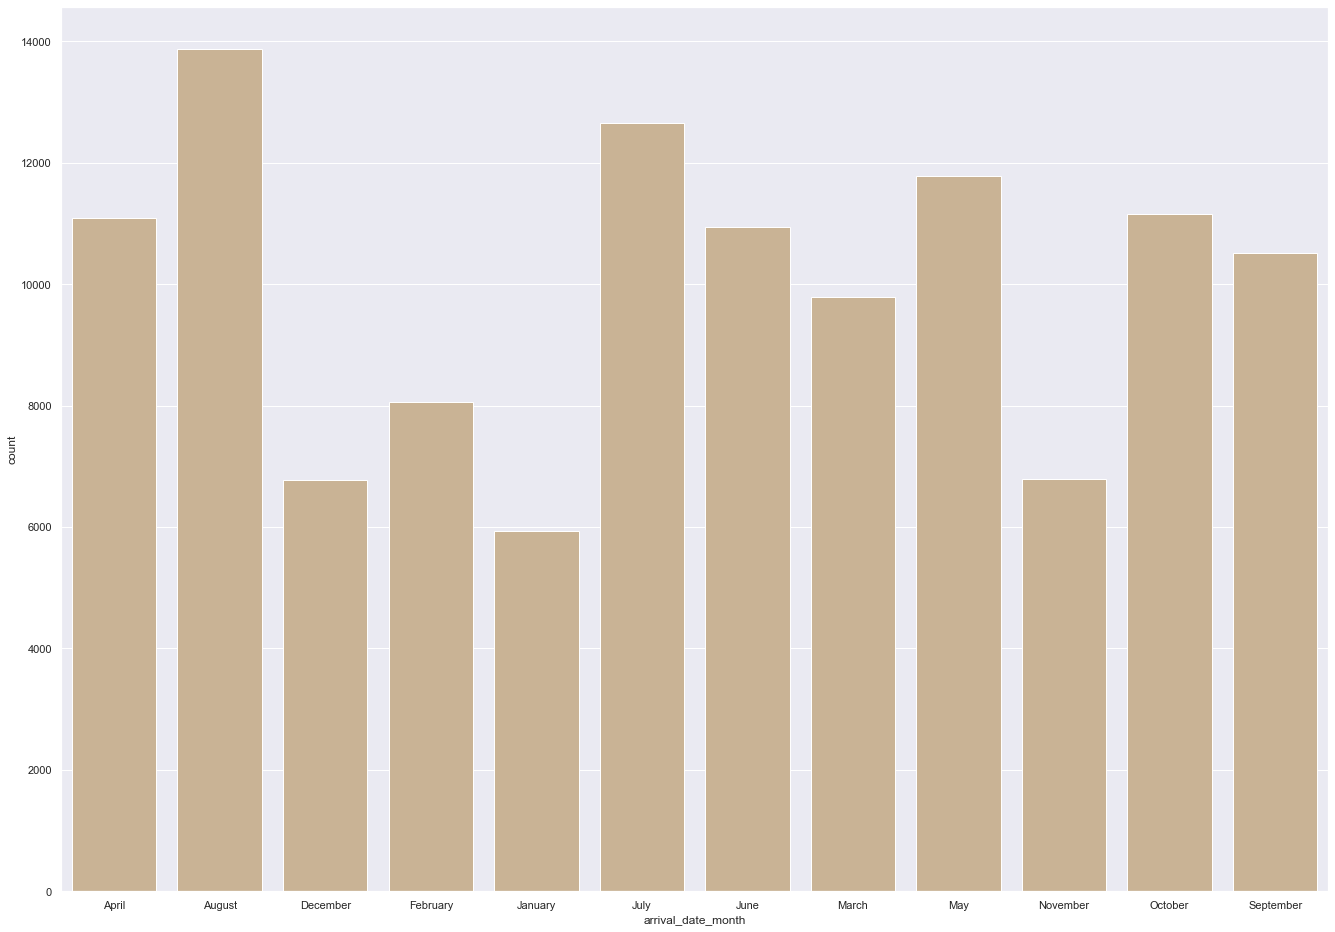

In [39]:
sns.countplot(x = 'arrival_date_month', data = data, color = ("#D2B48C"))
pass

Можем сделать вывод, что в июле и августе наибольшее бронирование.

In [42]:
data['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

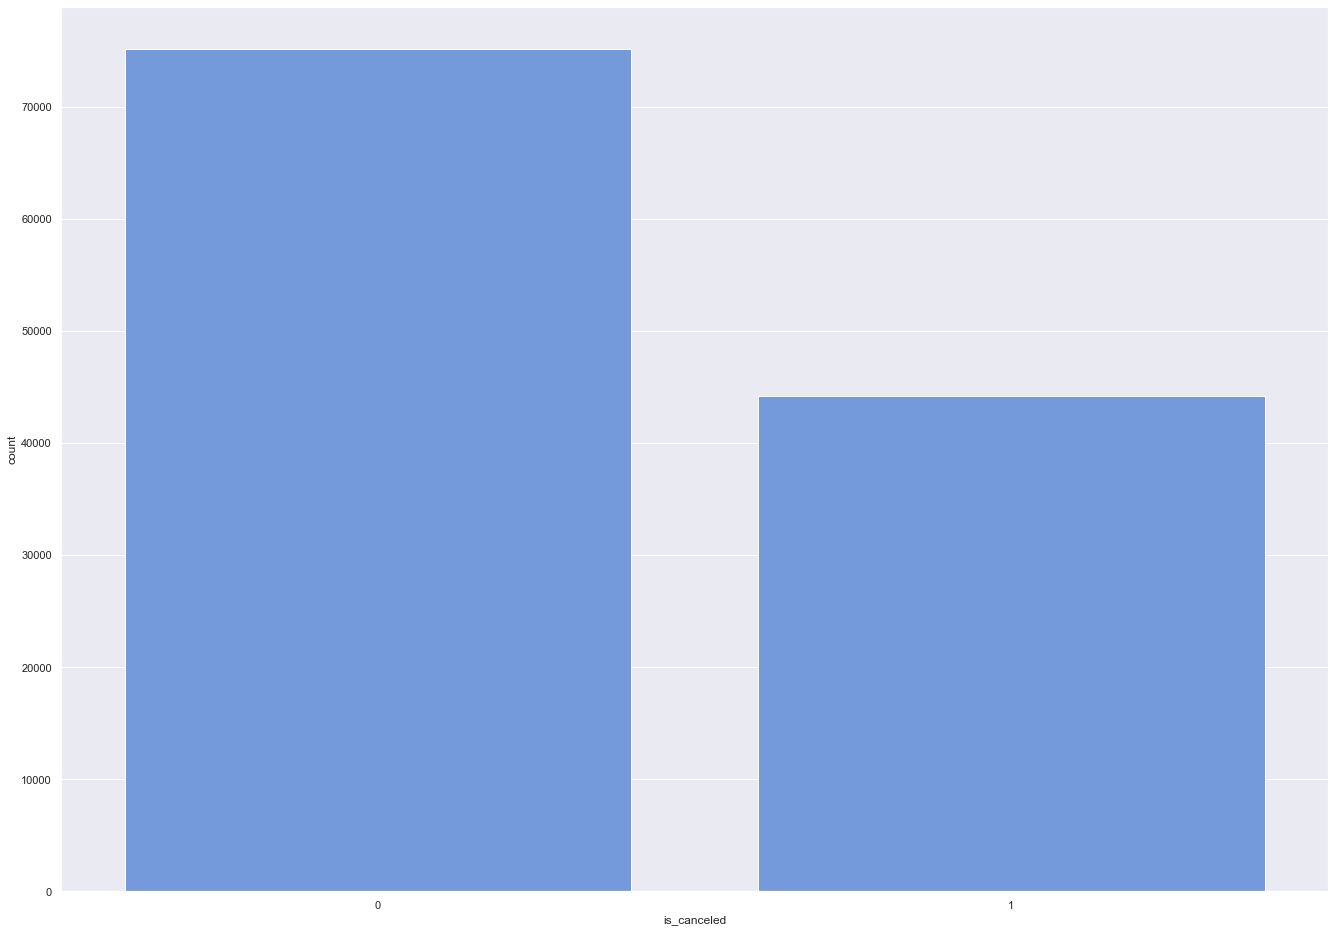

In [44]:
sns.countplot(x = 'is_canceled', order = data['is_canceled'].value_counts().index,  data = data, color = ("#6495ED"))
pass

Было отменено примерно 37% от всех бронирований.

## Обработка пропущенных значений.

In [46]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [47]:
data.fillna(data.median(axis = 0), axis = 0 , inplace = True)
data['country'].fillna(data['country'].mode().iloc[0], inplace=True)

In [48]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Пропущенные значения в столбцах с количесвенными признаками заполнили медианами, а с количественными модой, тем самым обработали все пропуски.

## Обработка категориальных признаков.

Для сохранения анонимности удалим столбцы с личной информацией клиентов: name, email, phone-number, credit_card.

In [30]:
data = data.drop(columns=['name', 'email', 'phone-number', 'credit_card'])

In [31]:
data.shape

(119390, 32)

In [53]:
num_columns   = [i for i in data.columns if data[i].dtype.name != 'category']
c_columns = [i for i in data.columns if data[i].dtype.name == 'category']
print('Категориальные признаки =', c_columns)
print('\nКоличественные признаки =', num_columns)

Категориальные признаки = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']

Количественные признаки = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [55]:
data_categorical = pd.get_dummies(data[c_columns])
print(data_categorical.columns)

Index(['hotel_City Hotel', 'hotel_Resort Hotel', 'arrival_date_month_April',
       'arrival_date_month_August', 'arrival_date_month_December',
       'arrival_date_month_February', 'arrival_date_month_January',
       'arrival_date_month_July', 'arrival_date_month_June',
       'arrival_date_month_March',
       ...
       'reservation_status_date_2017-09-03',
       'reservation_status_date_2017-09-04',
       'reservation_status_date_2017-09-05',
       'reservation_status_date_2017-09-06',
       'reservation_status_date_2017-09-07',
       'reservation_status_date_2017-09-08',
       'reservation_status_date_2017-09-09',
       'reservation_status_date_2017-09-10',
       'reservation_status_date_2017-09-12',
       'reservation_status_date_2017-09-14'],
      dtype='object', length=1167)


In [56]:
len(data_categorical.columns)

1167

In [57]:
data_categorical

hotel_City Hotel  hotel_Resort Hotel  arrival_date_month_April  \
0                      0                   1                         0   
1                      0                   1                         0   
2                      0                   1                         0   
3                      0                   1                         0   
4                      0                   1                         0   
...                  ...                 ...                       ...   
119385                 1                   0                         0   
119386                 1                   0                         0   
119387                 1                   0                         0   
119388                 1                   0                         0   
119389                 1                   0                         0   

        arrival_date_month_August  arrival_date_month_December  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   
...                           ...                          ...   
119385                          1                            0   
119386                          1                            0   
119387                          1                            0   
119388                          1                            0   
119389                          1                            0   

        arrival_date_month_February  arrival_date_month_January  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   
...                             ...                         ...   
119385                            0                           0   
119386                            0                           0   
119387                            0                           0   
119388                            0                           0   
119389                            0                           0   

        arrival_date_month_July  arrival_date_month_June  \
0                             1                        0   
1                             1                        0   
2                             1                        0   
3                             1                        0   
4                             1                        0   
...                         ...                      ...   
119385                        0                        0   
119386                        0                        0   
119387                        0                        0   
119388                        0                        0   
119389                        0                        0   

        arrival_date_month_March  ...  reservation_status_date_2017-09-03  \
0                              0  ...                                   0   
1                              0  ...                                   0   
2                              0  ...                                   0   
3                              0  ...                                   0   
4                              0  ...                                   0   
...                          ...  ...                                 ...   
119385                         0  ...                                   0   
119386                         0  ...                                   0   
119387                         0  ...                                   0   
119388                        

К категориальным признакам применили метод: каждый признак, принимающий n значений мы заменили на n признаков, принимающих значение 1 или 0.

## Нормализация.

In [61]:
data_num = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

In [62]:
new_data = data[data_num]
new_data.describe()

lead_time  arrival_date_year  arrival_date_week_number  \
count  119390.000000      119390.000000             119390.000000   
mean      104.011416        2016.156554                 27.165173   
std       106.863097           0.707476                 13.605138   
min         0.000000        2015.000000                  1.000000   
25%        18.000000        2016.000000                 16.000000   
50%        69.000000        2016.000000                 28.000000   
75%       160.000000        2017.000000                 38.000000   
max       737.000000        2017.000000                 53.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count              119390.000000            119390.000000   
mean                   15.798241                 0.927599   
std                     8.780829                 0.998613   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%                    23.000000                 2.000000   
max                    31.000000                19.000000   

       stays_in_week_nights         adults       children         babies  \
count         119390.000000  119390.000000  119386.000000  119390.000000   
mean               2.500302       1.856403       0.103890       0.007949   
std                1.908286       0.579261       0.398561       0.097436   
min                0.000000       0.000000       0.000000       0.000000   
25%                1.000000       2.000000       0.000000       0.000000   
50%                2.000000       2.000000       0.000000       0.000000   
75%                3.000000       2.000000       0.000000       0.000000   
max               50.000000      55.000000      10.000000      10.000000   

       is_repeated_guest  previous_cancellations  \
count      119390.000000           119390.000000   
mean            0.031912                0.087118   
std             0.175767                0.844336   
min             0.000000                0.000000   
25%             0.000000                0.000000   
50%             0.000000                0.000000   
75%             0.000000                0.000000   
max             1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes          agent  \
count                   119390.000000    119390.000000  103050.000000   
mean                         0.137097         0.221124      86.693382   
std                          1.497437         0.652306     110.774548   
min                          0.000000         0.000000       1.000000   
25%                          0.000000         0.000000       9.000000   
50%                          0.000000         0.000000      14.000000   
75%                          0.000000         0.000000     229.000000   
max                         72.000000        21.000000     535.000000   

           company  days_in_waiting_list            adr  \
count  6797.000000         119390.000000  119390.000000   
mean    189.266735              2.321149     101.831122   
std     131.655015             17.594721      50.535790   
min       6.000000              0.000000      -6.380000   
25%      62.000000              0.000000      69.290000   
50%     179.000000              0.000000      94.575000   
75%     270.000000              0.000000     126.000000   
max     543.000000            391.000000    5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                119390.000000              119390.000000  
mean                      0.062518                   0.571363  
std                       0.245291                   0.792798  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%                       0.000000             

In [63]:
data_norm = (new_data - new_data.mean(axis = 0)) / new_data.std(axis = 0)
data_norm.describe()

lead_time  arrival_date_year  arrival_date_week_number  \
count  1.193900e+05       1.193900e+05              1.193900e+05   
mean  -4.810214e-15      -1.368946e-13              7.414698e-16   
std    1.000000e+00       1.000000e+00              1.000000e+00   
min   -9.733146e-01      -1.634761e+00             -1.923183e+00   
25%   -8.048748e-01      -2.212855e-01             -8.206585e-01   
50%   -3.276287e-01      -2.212855e-01              6.136116e-02   
75%    5.239281e-01       1.192190e+00              7.963776e-01   
max    5.923360e+00       1.192190e+00              1.898902e+00   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count               1.193900e+05             1.193900e+05   
mean                1.723649e-16             5.805366e-14   
std                 1.000000e+00             1.000000e+00   
min                -1.685290e+00            -9.288865e-01   
25%                -8.880985e-01            -9.288865e-01   
50%                 2.297721e-02             7.250190e-02   
75%                 8.201684e-01             1.073890e+00   
max                 1.731244e+00             1.809749e+01   

       stays_in_week_nights        adults      children        babies  \
count          1.193900e+05  1.193900e+05  1.193860e+05  1.193900e+05   
mean           2.683450e-15  2.437054e-15  2.846171e-14 -6.143698e-15   
std            1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min           -1.310234e+00 -3.204779e+00 -2.606622e-01 -8.157892e-02   
25%           -7.862039e-01  2.478962e-01 -2.606622e-01 -8.157892e-02   
50%           -2.621733e-01  2.478962e-01 -2.606622e-01 -8.157892e-02   
75%            2.618573e-01  2.478962e-01 -2.606622e-01 -8.157892e-02   
max            2.489129e+01  9.174379e+01  2.482957e+01  1.025497e+02   

       is_repeated_guest  previous_cancellations  \
count       1.193900e+05            1.193900e+05   
mean       -4.172520e-14            5.787542e-14   
std         1.000000e+00            1.000000e+00   
min        -1.815596e-01           -1.031791e-01   
25%        -1.815596e-01           -1.031791e-01   
50%        -1.815596e-01           -1.031791e-01   
75%        -1.815596e-01           -1.031791e-01   
max         5.507786e+00            3.069024e+01   

       previous_bookings_not_canceled  booking_changes         agent  \
count                    1.193900e+05     1.193900e+05  1.030500e+05   
mean                    -8.708821e-15    -1.231855e-15  4.051468e-14   
std                      1.000000e+00     1.000000e+00  1.000000e+00   
min                     -9.155438e-02    -3.389884e-01 -7.735837e-01   
25%                     -9.155438e-02    -3.389884e-01 -7.013649e-01   
50%                     -9.155438e-02    -3.389884e-01 -6.562282e-01   
75%                     -9.155438e-02    -3.389884e-01  1.284651e+00   
max                      4.799061e+01     3.185451e+01  4.047018e+00   

            company  days_in_waiting_list           adr  \
count  6.797000e+03          1.193900e+05  1.193900e+05   
mean  -1.714418e-15          6.828137e-14  6.270327e-14   
std    1.000000e+00          1.000000e+00  1.000000e+00   
min   -1.392022e+00         -1.319230e-01 -2.141277e+00   
25%   -9.666683e-01         -1.319230e-01 -6.439223e-01   
50%   -7.798211e-02         -1.319230e-01 -1.435838e-01   
75%    6.132183e-01         -1.319230e-01  4.782527e-01   
max    2.686820e+00          2.209065e+01  1.048399e+02   

       required_car_parking_spaces  total_of_special_requests  
count                 1.193900e+05               1.193900e+05  
mean                  1.519090e-15              -8.461662e-14  
std                   1.000000e+00               1.000000e+00  
min                  -2.548718e-01              -7.206911e-01  
25%                  -2.548718e-01              -7.206911e-01  
50%                  -2.548718e-01              -7.206911e-01  
75%                  -2.548718e-01               5.406636e-01  
max                   3.235

In [78]:
data = pd.concat((data['is_canceled'], data_norm, data_categorical), axis = 1)
print(data.shape)

(119390, 1187)


In [80]:
data

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0                 0   2.227042          -1.634761                 -0.012140   
1                 0   5.923360          -1.634761                 -0.012140   
2                 0  -0.907810          -1.634761                 -0.012140   
3                 0  -0.851664          -1.634761                 -0.012140   
4                 0  -0.842306          -1.634761                 -0.012140   
...             ...        ...                ...                       ...   
119385            0  -0.758086           1.192190                  0.575873   
119386            0  -0.018822           1.192190                  0.575873   
119387            0  -0.655151           1.192190                  0.575873   
119388            0   0.046682           1.192190                  0.575873   
119389            0   0.945028           1.192190                  0.575873   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                       -1.685290                -0.928887   
1                       -1.685290                -0.928887   
2                       -1.685290                -0.928887   
3                       -1.685290                -0.928887   
4                       -1.685290                -0.928887   
...                           ...                      ...   
119385                   1.617360                 1.073890   
119386                   1.731244                 1.073890   
119387                   1.731244                 1.073890   
119388                   1.731244                 1.073890   
119389                   1.503475                 1.073890   

        stays_in_week_nights    adults  children    babies  ...  \
0                  -1.310234  0.247896 -0.260662 -0.081579  ...   
1                  -1.310234  0.247896 -0.260662 -0.081579  ...   
2                  -0.786204 -1.478441 -0.260662 -0.081579  ...   
3                  -0.786204 -1.478441 -0.260662 -0.081579  ...   
4                  -0.262173  0.247896 -0.260662 -0.081579  ...   
...                      ...       ...       ...       ...  ...   
119385              1.309918  0.247896 -0.260662 -0.081579  ...   
119386              1.309918  1.974234 -0.260662 -0.081579  ...   
119387              1.309918  0.247896 -0.260662 -0.081579  ...   
119388              1.309918  0.247896 -0.260662 -0.081579  ...   
119389              2.357980  0.247896 -0.260662 -0.081579  ...   

        reservation_status_date_2017-09-03  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
119385                                   0   
119386                                   0   
119387                                   0   
119388                                   0   
119389                                   0   

        reservation_status_date_2017-09-04  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
119385                                   0   
119386                                   0   
119387                                   0   
119388                                   0   
119389                                   0   

        reservation_status_date_2017-09-05  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
119385                                   0   
119386                             

## Разбиение данных на обучающую и тестовую выборки.

In [81]:
x = data.drop('is_canceled', axis = 1)
feature_names = x.columns
y = data['is_canceled']
type(feature_names)

x = x.to_numpy()
y = y.to_numpy()
N, d = x.shape
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

N_train, _ = x_train.shape 
N_test, _ = x_test.shape 

print(N_train, N_test)

89542 29848


Тестовая выборка - 25%, обучающая выборка - 75%.